<a href="https://colab.research.google.com/github/Kimhantag/Posco_AIBigdata_Academy25_edu/blob/main/2.MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture5; Multilayer Perceptron

## Multilayer Perceptron

In [ ]:
import tensorflow as tf  # TensorFlow 라이브러리를 tf로 임포트합니다. TensorFlow는 기계 학습과 수치 계산에 사용됩니다.
import numpy as np  # numpy 라이브러리를 np로 임포트합니다. numpy는 배열에 대한 수치 연산을 위해 사용됩니다.
import matplotlib.pyplot as plt  # matplotlib의 pyplot 모듈을 plt로 임포트합니다. 이는 그래프를 그리기 위해 사용됩니다.
import random  # random 모듈을 임포트합니다. 이 모듈은 난수를 생성하는 데 사용됩니다.

# 아래 세 줄은 재현 가능한 결과를 얻기 위해 난수 생성기의 시드 값을 설정합니다.
random.seed(1)  # Python 내장 random 모듈의 시드 값을 1로 설정합니다.
np.random.seed(1)  # numpy 라이브러리의 난수 생성기 시드 값을 1로 설정합니다.
tf.random.set_seed(1)  # TensorFlow의 난수 생성기 시드 값을 1로 설정합니다.

### Data processing

### Define Neural Network

In [ ]:
# MNIST 데이터 세트를 준비합니다.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # MNIST 데이터를 로드합니다. 데이터는 학습 세트와 테스트 세트로 구분됩니다.

# 데이터를 float32 타입으로 변환합니다.
x_train, x_test = tf.cast(x_train, tf.float32), tf.cast(x_test, tf.float32)  # 이미지 데이터를 float32 타입으로 캐스팅하여, 연산에 적합하게 만듭니다.

num_classes = 10  # 클래스(레이블)의 개수를 설정합니다. MNIST는 0부터 9까지의 숫자를 분류하므로, 클래스는 총 10개입니다.
num_features = x_train.shape[1] * x_train.shape[2]  # 특성(이미지의 픽셀)의 총 개수를 계산합니다. MNIST 이미지는 28x28 픽셀이므로, 784개의 특성이 있습니다.

print(num_classes)  # 클래스의 개수를 출력합니다.
print(num_features)  # 특성의 총 개수를 출력합니다.

# 이미지를 1-D 벡터 형태로 변환합니다. 이는 이미지의 각 픽셀이 특성 벡터의 한 요소가 됩니다.
x_train, x_test = tf.reshape(x_train, [-1, num_features]), tf.reshape(x_test, [-1, num_features])  # 각 이미지를 784(28*28) 크기의 1-D 벡터로 변환합니다.

# 이미지의 픽셀 값을 [0, 255] 범위에서 [0, 1] 범위로 정규화합니다. 이는 모델 학습을 용이하게 합니다.
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 [==============================] - 1s 0us/step
10
784


In [ ]:
# #만약에 tensorflow.keras.Model 혹은 tensorflow.keras.layers를 사용하지 않고 직접 Neural Network를 코딩해야한다면

# W1=tf.Variable(tf.random_normal_initializer(stddev=1)([num_features, 128])),
# W2=tf.Variable(tf.random_normal_initializer(stddev=1)([128, 256])),
# W3=tf.Variable(tf.random_normal_initializer(stddev=1)([256, num_classes]))
# b1=tf.Variable(tf.zeros([128])),
# b2=tf.Variable(tf.zeros([256])),
# b3=tf.Variable(tf.zeros([num_classes]))

# def neural_net(x):
#     layer_1 = tf.matmul(x, W1) + b1
#     layer_1 = tf.nn.relu(layer_1)

#     layer_2 = tf.matmul(layer_1, W2) + b2
#     layer_2 = tf.nn.relu(layer_2)

#     out_layer = tf.matmul(layer_2, W3) + b3
#     return tf.nn.softmax(out_layer)

In [ ]:
# tensorflow.keras.Model과 tensorflow.keras.layers를 임포트합니다.
from tensorflow.keras import Model, layers

# NeuralNet 클래스를 정의합니다. 이 클래스는 Model을 상속받아 구현됩니다.
class NeuralNet(Model):
    def __init__(self):
        super(NeuralNet, self).__init__()  # 부모 클래스의 생성자를 호출합니다.
        # 첫 번째 완전 연결(fully connected) 레이어를 정의합니다. 128개의 뉴런과 ReLU 활성화 함수를 사용합니다.
        self.fc1 = layers.Dense(128, activation=tf.nn.relu)
        # 두 번째 완전 연결 레이어를 정의합니다. 256개의 뉴런과 ReLU 활성화 함수를 사용합니다.
        self.fc2 = layers.Dense(256, activation=tf.nn.relu)
        # 출력 레이어를 정의합니다. 분류해야 하는 클래스의 수만큼 뉴런을 가집니다. 여기서는 softmax 활성화 함수를 사용하지 않습니다.
        self.out = layers.Dense(num_classes)

    def call(self, x, is_training=False):
        # 입력 데이터 x를 첫 번째 레이어(fc1)에 전달합니다.
        x = self.fc1(x)
        # 첫 번째 레이어의 출력을 두 번째 레이어(fc2)에 전달합니다.
        x = self.fc2(x)
        # 두 번째 레이어의 출력을 출력 레이어(out)에 전달합니다.
        x = self.out(x)
        # 학습 중이 아닐 때(예측/평가 단계에서) softmax 활성화 함수를 적용합니다.
        # 이는 모델이 로짓(raw output) 대신 확률을 반환하게 합니다.
        if not is_training:
            x = tf.nn.softmax(x)
        return x

# NeuralNet 클래스의 인스턴스를 생성합니다. 이 인스턴스는 이제 모델 객체로 사용됩니다.
neural_net = NeuralNet()

In [ ]:
def cross_entropy_loss(x, y):
    # x: 모델이 예측한 로짓 값, y: 실제 레이블
    y = tf.cast(y, tf.int64)  # 실제 레이블을 int64 타입으로 캐스팅합니다.
    # sparse_softmax_cross_entropy_with_logits 함수를 사용하여 교차 엔트로피 손실을 계산합니다.
    # 이 함수는 로짓과 실제 레이블을 입력으로 받아, 각 샘플에 대한 손실을 계산합니다.
    # logits를 직접 사용하는 것이 수치적으로 더 안정적(numerically stable)입니다.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    return tf.reduce_mean(loss)  # 손실 값들의 평균을 반환합니다. 이는 전체 배치에 대한 평균 손실입니다.

# 정확도 측정 함수를 정의합니다.
def accuracy(y_pred, y_true):
    # tf.argmax 함수를 사용하여 예측된 확률이 가장 높은 인덱스(클래스)를 찾습니다. axis=1은 각 행에서 최댓값을 찾겠다는 의미입니다.
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    # 정확한 예측을 True(1), 그렇지 않은 예측을 False(0)로 변환합니다.
    # tf.cast 함수를 사용하여 이 boolean 값을 float32 타입으로 변환한 후,
    # tf.reduce_mean 함수를 사용하여 전체 정확도를 계산합니다.
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# 학습률 설정
lr = 0.003
# SGD(Stochastic Gradient Descent, 확률적 경사 하강법) 옵티마이저를 초기화합니다. 학습률을 lr로 설정합니다.
optimizer = tf.optimizers.SGD(lr)

def run_optimization(x, y): # w = w - a *delta(L)
    # TensorFlow의 GradientTape을 사용하여 자동 미분을 위한 컨텍스트를 생성합니다.
    # 이는 학습 가능한 변수(모델의 가중치)에 대한 손실 함수의 그래디언트를 계산하는 데 사용됩니다.
    with tf.GradientTape() as g:
        # 모델을 호출하여 입력 x에 대한 예측을 생성합니다. 이때 is_training 플래그를 True로 설정하여
        # 훈련 중임을 나타냅니다. (모델 내에서 다르게 동작할 요소가 있다면 이를 구분할 수 있습니다.)
        pred = neural_net(x, is_training=True)
        # 손실 함수를 호출하여 예측된 결과와 실제 레이블 y 사이의 손실을 계산합니다.
        loss = cross_entropy_loss(pred, y)

    # 모델의 학습 가능한 변수(가중치 등)를 가져옵니다.
    trainable_variables = neural_net.trainable_variables
    # GradientTape의 gradient 메소드를 사용하여 주어진 손실에 대한 각 학습 가능 변수의 그래디언트를 계산합니다.
    gradients = g.gradient(loss, trainable_variables)
    # 계산된 그래디언트와 각 변수를 옵티마이저에 적용하여 학습 과정에서 변수를 업데이트합니다.
    optimizer.apply_gradients(zip(gradients, trainable_variables))


In [ ]:
# tf.data API를 사용하여 데이터를 셔플링(shuffle) 및 배치(batch) 처리합니다.
batch_size = 200  # 배치 크기를 설정합니다.
# 학습 데이터를 tf.data.Dataset 객체로 변환합니다. 이 객체는 데이터를 효율적으로 로드하고 처리하는 메커니즘을 제공합니다.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# 데이터셋을 셔플링하고 지정된 배치 크기로 데이터를 분할합니다. prefetch(1)은 학습 도중 다음 배치를 미리 준비해 둡니다.
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

epoch = 40  # 전체 데이터 세트에 대해 학습을 반복할 횟수입니다.
display_epoch = 4  # 학습 진행 상황을 표시할 에폭 간격입니다.

# 지정된 에폭 수만큼 훈련을 진행합니다.
for epo in range(1, epoch+1):
    # 한 에폭에서, 모든 배치를 순회합니다.
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        # 각 배치에 대해 최적화를 실행합니다. 이는 모델의 가중치를 업데이트하는 과정을 포함합니다.
        run_optimization(batch_x, batch_y)

    # 지정된 에폭 간격마다 학습 진행 상황을 출력합니다.
    if epo % display_epoch == 0:
        pred = neural_net(batch_x)  # 현재 배치에 대한 예측을 수행합니다.
        loss = cross_entropy_loss(pred, batch_y)  # 현재 배치에 대한 손실을 계산합니다.
        acc = accuracy(pred, batch_y)  # 현재 배치에 대한 정확도를 계산합니다.
        # 에폭 번호, 손실, 정확도를 출력합니다.
        print("epoch: ", epo, ", loss: ", loss.numpy(), ", acc: ", acc.numpy())

epoch:  4 , loss:  1.885659 , acc:  0.825
epoch:  8 , loss:  1.7182221 , acc:  0.875
epoch:  12 , loss:  1.6614057 , acc:  0.885
epoch:  16 , loss:  1.6558838 , acc:  0.88
epoch:  20 , loss:  1.596233 , acc:  0.925
epoch:  24 , loss:  1.6132727 , acc:  0.9
epoch:  28 , loss:  1.5950186 , acc:  0.935
epoch:  32 , loss:  1.5840187 , acc:  0.93
epoch:  36 , loss:  1.5845675 , acc:  0.92
epoch:  40 , loss:  1.577076 , acc:  0.935


In [ ]:
# Test model on validation set.
pred = neural_net(x_test)
print("Test Accuracy: ", accuracy(pred, y_test).numpy())

Test Accuracy:  0.926


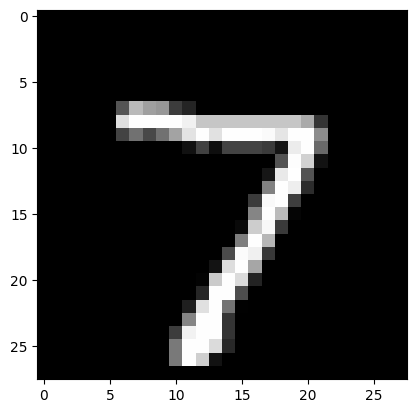

Model prediction: 7


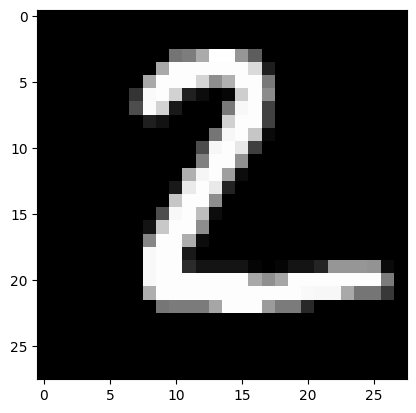

Model prediction: 2


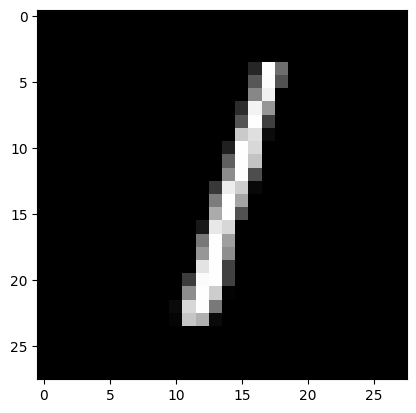

Model prediction: 1


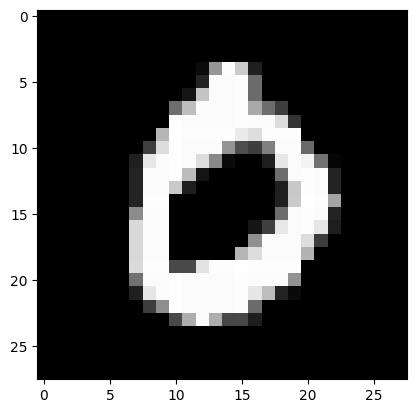

Model prediction: 0


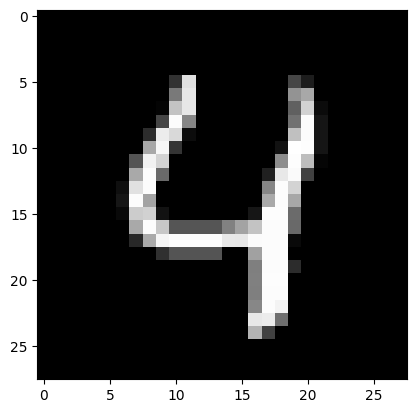

Model prediction: 4


In [ ]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)
# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

## model.fit방식으로 구현

In [ ]:
model2=tf.keras.Sequential(                           # build block
    [tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dense(10)
     ])

In [ ]:
model2.compile(optimizer='SGD', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
               , metrics=['accuracy'])                                    # 어떤 loss func을 사용하고, metric, optimizer를 사용할지 결정

Epoch 1/40
469/469 [==============================] - 2s 3ms/step - loss: 1.3073 - accuracy: 0.6889
Epoch 2/40
469/469 [==============================] - 1s 3ms/step - loss: 0.5096 - accuracy: 0.8692
Epoch 3/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3921 - accuracy: 0.8923
Epoch 4/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.9027
Epoch 5/40
469/469 [==============================] - 1s 3ms/step - loss: 0.3187 - accuracy: 0.9100
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2992 - accuracy: 0.9155
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2832 - accuracy: 0.9201
Epoch 8/40
469/469 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.9235
Epoch 9/40
469/469 [==============================] - 1s 3ms/step - loss: 0.2580 - accuracy: 0.9266
Epoch 10/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2472 - accuracy: 0.9297

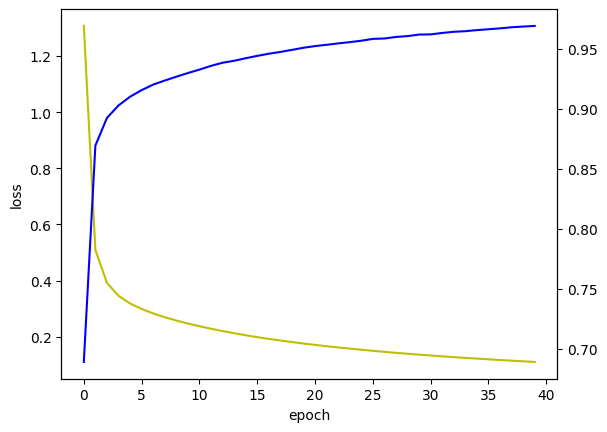

313/313 [==============================] - 1s 2ms/step - loss: 0.1154 - accuracy: 0.9659


In [ ]:
inform=model2.fit(x_train, y_train, batch_size=128, epochs=40)            # batch size는 default가 32라고 함, val dataset을 넣어줄 수도 있고, 자동으로 쪼개서 쓰기도 함, validation_split=0.2


fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(inform.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(inform.history['accuracy'], 'b', label='train acc')


plt.show()


test_loss, test_acc = model2.evaluate(x_test, y_test) # verbose = 0 --> ignore, 1 --> progress bare, 2--> one line per epoch